In [1]:
# import libraries
import numpy as np
import pandas as pd
import random
from sklearn.cluster import KMeans
# for plotting
import matplotlib.pyplot as plt
# for clique
from pyclustering.cluster.clique import clique, clique_visualizer
from pyclustering.cluster import cluster_visualizer_multidim
# cite package: https://pypi.org/project/pyclustering/
# https://pyclustering.github.io/docs/0.9.2/html/d5/d41/classpyclustering_1_1cluster_1_1encoder_1_1type__encoding.html#a55e89d2bfa06402ce1ccd13fa478cc19

In [2]:
# set a seed, just in case
random.seed(1234)

In [3]:
# import data
features = pd.read_csv("nci.data.csv") 
features.drop(features.columns[0], axis = 1, inplace = True)
features = features.T

labels = pd.read_csv("nci.label.txt", header = None)
labels = labels[0].str.strip()
labels.loc[labels == 'K562A-repro'] = 'K562'
labels.loc[labels == 'K562B-repro'] = 'K562'
labels.loc[labels == 'MCF7A-repro'] = 'MCF7'
labels.loc[labels == 'MCF7D-repro'] = 'MCF7'

# labels.unique()

In [4]:
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(features)

In [5]:
predictions = pd.DataFrame(kmeans.predict(features))
predictions = pd.concat([labels.reset_index(drop=True), predictions], axis = 1)
predictions.columns = ["label", "prediction"]

In [6]:
pd.crosstab(predictions["label"], predictions["prediction"]).T
# NSCLC is the only one that's slightly different 
# from the book's results (but in a way that's actually better)

label,BREAST,CNS,COLON,K562,LEUKEMIA,MCF7,MELANOMA,NSCLC,OVARIAN,PROSTATE,RENAL,UNKNOWN
prediction,,,,,,,,,,,,
0,2,0,7,2,6,2,0,0,0,0,0,0
1,2,0,0,0,0,0,7,0,0,0,0,0
2,3,5,0,0,0,0,1,9,6,2,9,1


ESL, p. 514: "We see that the procedure is successful at grouping together samples of the same cancer. In fact, the two breast cancers in the second cluster were later found to be misdiagnosed and were melanomas that had metastasized"

In [7]:
#pip install pyclustering

In [8]:
# example from documentation:

# read two-dimensional input data 'Target'
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES
data = read_sample(FCPS_SAMPLES.SAMPLE_TARGET)

# create CLIQUE algorithm for processing
intervals = 10  # defines amount of cells in grid in each dimension
threshold = 0   # lets consider each point as non-outlier
clique_instance = clique(data, intervals, threshold)
# start clustering process and obtain results
clique_instance.process()

Amount of clusters: 6


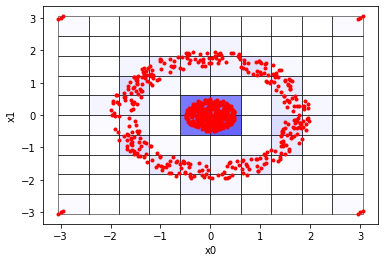

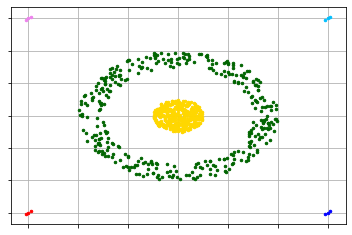

In [9]:
clusters = clique_instance.get_clusters()  # allocated clusters
noise = clique_instance.get_noise()     # points that are considered as outliers (in this example should be empty)
cells = clique_instance.get_cells()     # CLIQUE blocks that forms grid
print("Amount of clusters:", len(clusters))
# visualize clustering results
clique_visualizer.show_grid(cells, data)    # show grid that has been formed by the algorithm
clique_visualizer.show_clusters(data, clusters, noise)  # show clustering results

In [10]:
# try our dataset

In [11]:
# nci data, preprocess to input in clique function
features_as_list = features.values.tolist()
# features.shape
# len(features_as_list)

In [12]:
intervals = 2  # defines amount of cells in grid in each dimension
threshold = 0   # lets consider each point as non-outlier
clique_instance = clique(features_as_list, intervals, threshold)
clique_instance.process()
clusters = clique_instance.get_clusters()  # allocated clusters
noise = clique_instance.get_noise()     # points that are considered as outliers (in this example should be empty)
cells = clique_instance.get_cells()     # CLIQUE blocks that forms grid
print("Amount of clusters:", len(clusters))

Amount of clusters: 0


In [13]:
cells # might be empty because it's not 2 or 3-dimensional

[]

In [14]:
clique_instance.get_cluster_encoding()

<type_encoding.CLUSTER_INDEX_LIST_SEPARATION: 1>

In [15]:
# means, as stated in CLIQUE paper, "there are no clusters in the original data space."

In [16]:
# compare input to example input to see if that's the problem

#len(data)
#type(data)
#type(data[1])
#type(data[1][1])

#type(features_as_list)
#type(features_as_list[1])
#type(features_as_list[1][1])
# they match; not a datatype issue

In [17]:
# maybe the number of features is too large??
# here is a subset to see if clique can run on this dataset.
features2 = features.loc[:, 0:10]
features2_as_list = features2.values.tolist()
intervals = 2 # defines amount of cells in grid in each dimension
threshold = 0   # lets consider each point as non-outlier
clique_instance = clique(features2_as_list, intervals, threshold)
clique_instance.process()
clusters = clique_instance.get_clusters()  # allocated clusters
noise = clique_instance.get_noise()     # points that are considered as outliers (in this example should be empty)
cells = clique_instance.get_cells()     # CLIQUE blocks that forms grid
print("Amount of clusters:", len(clusters))

Amount of clusters: 36


In [18]:
# basically means that clique doesn't actually do well in higher dimensions?
# at least, in this case does not find any clusters.

In [19]:
# visualizer = cluster_visualizer_multidim()
# visualizer.append_clusters(clusters, features_as_list)
# visualizer.show(max_row_size=3)

In [20]:
# well obviously it's not working, so let's apply kmeans and see if that's worse.

In [21]:
data_df = pd.DataFrame(data)

In [22]:
kmeans2 = KMeans(n_clusters = 6, random_state = 0).fit(data_df)

In [23]:
kmeans2

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [24]:
predictions2 = kmeans2.predict(data_df)

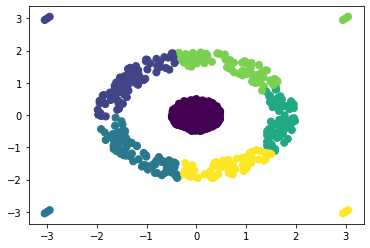

In [25]:
plt.scatter(x = data_df.loc[:,0], y = data_df.loc[:,1], s = 50, c = predictions2)